In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Read the dataset
df = pd.read_csv('./WEATHER_DATASET.csv')
display(df)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Unnamed: 8
0,1/1/2012 0:00,-1.8,-3.9,86.0,4,8.0,101.24,Fog,NaN
1,1/1/2012 1:00,-1.8,-3.7,87.0,4,8.0,101.24,Fog,NaN
2,1/1/2012 2:00,-1.8,-3.4,89.0,7,4.0,101.26,"Freezing Drizzle,Fog",NaN
3,1/1/2012 3:00,-1.5,-3.2,88.0,6,4.0,101.27,"Freezing Drizzle,Fog",NaN
4,1/1/2012 4:00,-1.5,-3.3,88.0,7,4.8,101.23,Fog,NaN
...,...,...,...,...,...,...,...,...,...
8780,12/31/2012 19:00,0.1,-2.7,81.0,30,9.7,100.13,Snow,NaN
8781,12/31/2012 20:00,0.2,-2.4,83.0,24,9.7,100.03,Snow,NaN
8782,12/31/2012 21:00,-0.5,-1.5,93.0,28,4.8,99.95,Snow,NaN
8783,12/31/2012 22:00,-0.2,-1.8,89.0,28,9.7,99.91,Snow,NaN


In [21]:
# Display few rows from the dataset
few_rows = df.head(7)
display(few_rows)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Unnamed: 8
0,1/1/2012 0:00,-1.8,-3.9,86.0,4,8.0,101.24,Fog,NaN
1,1/1/2012 1:00,-1.8,-3.7,87.0,4,8.0,101.24,Fog,NaN
2,1/1/2012 2:00,-1.8,-3.4,89.0,7,4.0,101.26,"Freezing Drizzle,Fog",NaN
3,1/1/2012 3:00,-1.5,-3.2,88.0,6,4.0,101.27,"Freezing Drizzle,Fog",NaN
4,1/1/2012 4:00,-1.5,-3.3,88.0,7,4.8,101.23,Fog,NaN
5,1/1/2012 5:00,-1.4,-3.3,87.0,9,6.4,101.27,Fog,NaN
6,1/1/2012 6:00,-1.5,-3.1,89.0,7,6.4,101.29,Fog,NaN


In [22]:
# Identify Data types of each column
df.dtypes

Date/Time            object
Temp_C               object
Dew Point Temp_C    float64
Rel Hum_%           float64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
Unnamed: 8           object
dtype: object

In [23]:
# Check for Missing Values
df.isnull().sum()

Date/Time              0
Temp_C                 0
Dew Point Temp_C       0
Rel Hum_%              0
Wind Speed_km/h        0
Visibility_km          0
Press_kPa              0
Weather                0
Unnamed: 8          8784
dtype: int64

In [24]:
# Check for duplicate values and delete if any
duplicates = df.duplicated()
display(df[duplicates])

# deleting the duplicate data
df1 = df.drop_duplicates()
dup = df1.duplicated()
display(df1[dup])

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Unnamed: 8
11,1/1/2012 2:00,-1.8,-3.4,89.0,7,4.0,101.26,"Freezing Drizzle,Fog",NaN


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Unnamed: 8


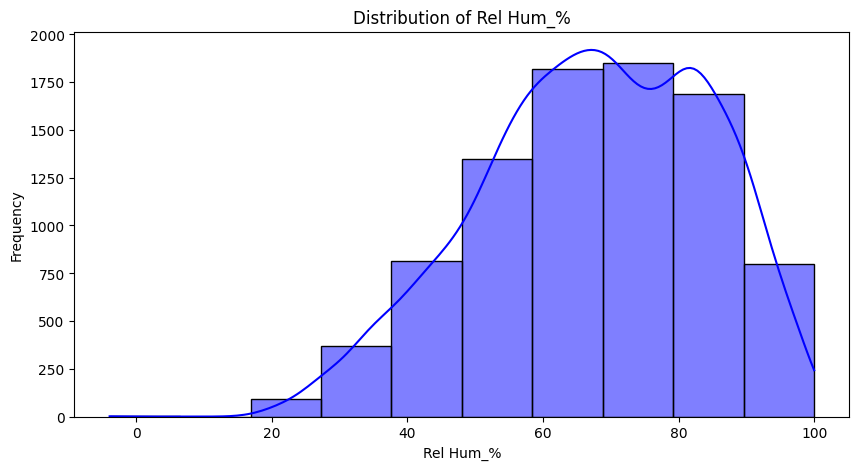

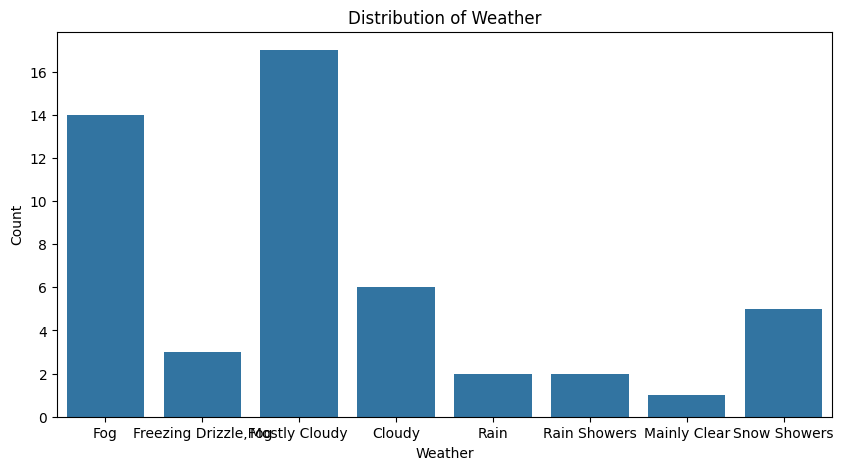

In [49]:
# Create histograms or bar charts for numerical and categorical column to visualize their distribution
numerical = df.select_dtypes(include=['int64', 'float64']).columns
categorical = "Weather"

column = numerical[1]
column1 = df[categorical].head(50)

plt.figure(figsize=(10, 5))
sns.histplot(df[column], kde=True, bins=10, color='blue')
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=column1)
plt.title(f"Distribution of {categorical}")
plt.xlabel(categorical)
plt.ylabel("Count")
plt.show()


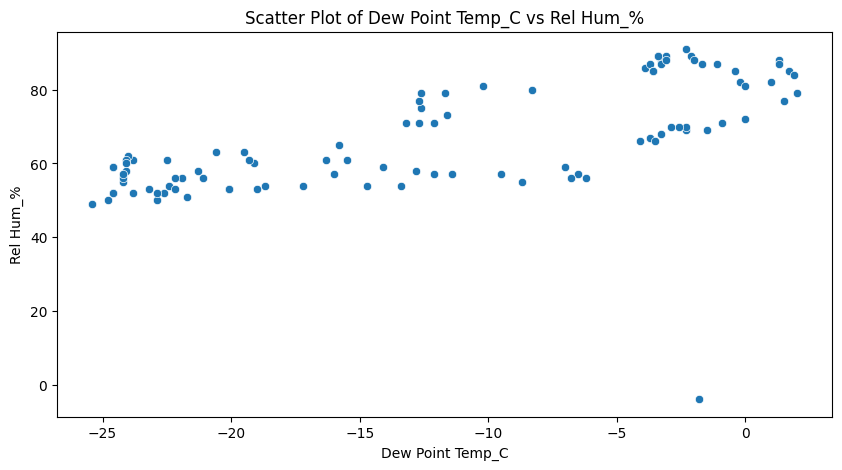

In [48]:
# Generate scatter plots or pair plots to explore the relationships between pairs of numerical variables
data1 = df[numerical[0]].head(100)
data2 = df[numerical[1]].head(100)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data1, y=data2)
plt.title(f"Scatter Plot of {numerical[0]} vs {numerical[1]}")
plt.xlabel(numerical[0])
plt.ylabel(numerical[1])
plt.show()

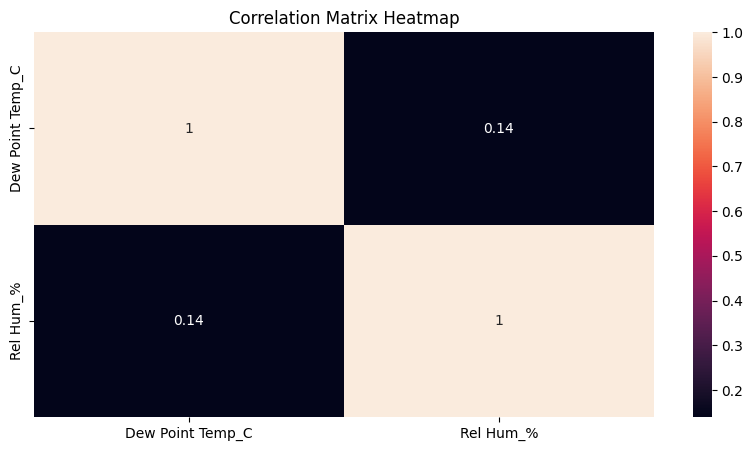

In [59]:
# Create a heatmap of the correlation matrix
corr_matrix = df[[numerical[0], numerical[1]]].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()